<a href="https://colab.research.google.com/github/imhyunho99/2023-1--MachineLearning/blob/main/08_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##이미 학습된 모델 새로운 훈련 데이터의 해결 방법



*   기존 훈련 데이터에 새로운 훈련 데이터 추가

훈련 양이 점차 늘어남

*   훈련 데이터의 크기를 일정하게 유지

기존 데이터를 삭제할때 질적으로 좋은 데이터를 삭제하게 되면 모델의 학습 능력이 크게 달라짐

==> Batch Learning, OffLine Learning

<br>

**대안**

점진적 학습(Incremental Learning=online learning)

기존의 모델을 버리지 않고 새로운 데이터만 학습

<br>
Learning rate ==> 높으면 새로운 데이터 셋에 빠르게 적응하지만 그만큼 기존에 모델에서 크게 변화함


##확률적 경사 하강법(Stochastic Gradiant Descent:SGD)


훈련 데이터에서 한개의 샘플을 선택하여 가장 가파른 길로 내려가는 방식의 학습법.



1.   확률적 경사 하강법

한개의 샘플로 경사 하강법 수행
2.   미니 배치 경사 하강법

여러개의 샘플로 경사 하강법 수행
3.   배치 경사 하강법 ==> offline learning 

전체 샘플로 경사 하강법 수행




손실 함수(Loss Func)


비용 함수(Cost func)

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [ ]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) #평균과 표준편차 맞춰주기(정규화)

In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)#이진 CrossEnt 사용 예정으로 log 사용, max_iter = 최대 Epoch, log==>log_loss로 변경 예정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#ConvergenceWarning : converge(수렴), 모델이 수렴하기 전에 Epoch를 다 돌았다. max_iter 34쓰면 안나옴옴

0.773109243697479
0.775


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
train_scaled.shape

(119, 5)

In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
sc.partial_fit(train_scaled, train_target)#11
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9663865546218487
0.925


Epoch와 과대/과소 적합

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [ ]:
for epoch in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    print("{}{:3f}{:3f}".format(epoch+1,train_score[epoch],test_score[epoch]))

10.5294120.650000
20.6218490.550000
30.6386550.575000
40.7310920.700000
50.7226890.700000
60.7310920.700000
70.7647060.725000
80.7310920.775000
90.8151260.825000
100.7478990.700000
110.8319330.825000
120.8151260.800000
130.8571430.850000
140.8571430.900000
150.8403360.850000
160.8655460.900000
170.8655460.900000
180.8655460.900000
190.8739500.900000
200.8739500.900000
210.8739500.900000
220.8655460.900000
230.8655460.900000
240.8823530.900000
250.8655460.900000
260.8823530.900000
270.8823530.900000
280.8823530.900000
290.8907560.900000
300.8907560.900000
310.8907560.900000
320.8907560.900000
330.8823530.900000
340.8823530.900000
350.8907560.900000
360.9075630.900000
370.9075630.900000
380.8991600.900000
390.9075630.900000
400.8991600.900000
410.8991600.900000
420.9075630.900000
430.9075630.900000
440.9075630.900000
450.9159660.900000
460.9159660.900000
470.9243700.900000
480.9243700.900000
490.9243700.900000
500.9243700.900000
510.9243700.900000
520.9243700.900000
530.9243700.900000
54

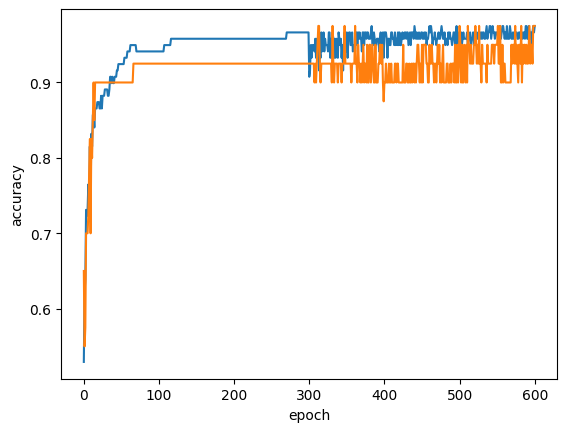

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)#loss: log=>hinge Support Vector Machine
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)#tol:none ==> no early stopping
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
